### Regression Ev Fiyatlarını Tahmin Etme

In [3]:
import pandas as pd
pd.set_option("display.max_columns", 100)
import numpy as np


import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns

from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import ExtraTreeRegressor

import warnings # Uyarilari gozardi etmek için
warnings.filterwarnings("ignore")

In [4]:
def showRegressionTest(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
    lr = LinearRegression()
    regmodel = lr.fit(x_train, y_train)
    y_pretest = lr.predict(x_test)
    mse = (mean_squared_error(y_test,y_pretest)) ** 0.5
    r = r2_score(y_test, y_pretest)
    print("Hata payi: ", mse)
    print("Basari orani: ", r)

In [5]:
def showRidgeTest(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
    R = Ridge()
    R.fit(x_train, y_train)
    y_pred_ridge = R.predict(x_test)
    mse = (mean_squared_error(y_test, y_pred_ridge)) ** 0.5
    r = r2_score(y_test, y_pred_ridge)
    print("Hata payi: ", mse)
    print("Basari orani: ", r)

In [6]:
def showLassoTest(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
    L = Lasso()
    L.fit(x_train, y_train)
    y_pred_lasso = L.predict(x_test)
    mse = (mean_squared_error(y_test, y_pred_lasso)) ** 0.5
    r = r2_score(y_test, y_pred_lasso) 
    print("Hata payi: ", mse)
    print("Basari orani: ", r)

In [7]:
def showElasticTest(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
    E = ElasticNet(l1_ratio = .8)
    E.fit(x_train,y_train) 
    y_pred_elastic = E.predict(x_test)
    mse = (mean_squared_error(y_test, y_pred_elastic)) ** 0.5
    r = r2_score(y_test, y_pred_elastic)
    print("Hata payi: ", mse)
    print("Basari orani: ", r)

In [8]:
def showExtraTreeTest(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
    ETR = ExtraTreeRegressor()
    ETR.fit(x_train, y_train)
    y_pred_etr= ETR.predict(x_test)
    mse = (mean_squared_error(y_test, y_pred_etr)) ** 0.5
    r = r2_score(y_test, y_pred_etr)
    print("Hata payi: ", mse)
    print("Basari orani: ", r)

In [9]:
df = pd.read_csv("kc_house_data.csv")

In [10]:
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15721,3797002575,20141010T000000,605000.0,4,1.50,1880,3500,1.0,0,0,4,7,1080,800,1926,0,98103,47.6835,-122.347,1690,3500
14284,7192800145,20141202T000000,420000.0,2,1.00,2100,4480,1.0,0,0,5,7,1400,700,1908,0,98126,47.5740,-122.372,1570,4400
16763,8682300010,20150206T000000,829000.0,3,2.75,2690,10443,1.0,0,0,3,9,2690,0,2007,0,98053,47.7185,-122.024,1440,4185
749,1138020200,20140903T000000,435000.0,4,1.50,1510,6460,1.0,0,0,3,7,1070,440,1970,0,98034,47.7121,-122.214,1450,6630
18380,5706500385,20150129T000000,200000.0,2,1.00,1400,9600,1.5,0,0,4,6,1400,0,1941,0,98022,47.2113,-121.993,1230,9600
9987,4040400200,20141007T000000,527500.0,5,2.25,2530,8250,2.0,0,0,4,7,2530,0,1961,0,98007,47.6117,-122.134,2020,8250
7658,7105600085,20141009T000000,500000.0,3,2.25,1730,13040,1.0,0,0,4,8,1290,440,1988,0,98052,47.6809,-122.119,1730,11016
17291,1974300020,20150218T000000,624900.0,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918
14849,6873000120,20140512T000000,420000.0,2,2.50,1480,1369,3.0,0,0,3,7,1480,0,2009,0,98052,47.6760,-122.121,1390,1337
2050,8732040810,20141104T000000,235000.0,4,2.75,1770,10184,1.0,0,0,3,8,1250,520,1979,0,98023,47.3074,-122.385,2070,8320


In [11]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [12]:
abs(df.corr()["price"]).sort_values(ascending = False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
zipcode          0.053203
condition        0.036362
long             0.021626
id               0.016762
Name: price, dtype: float64

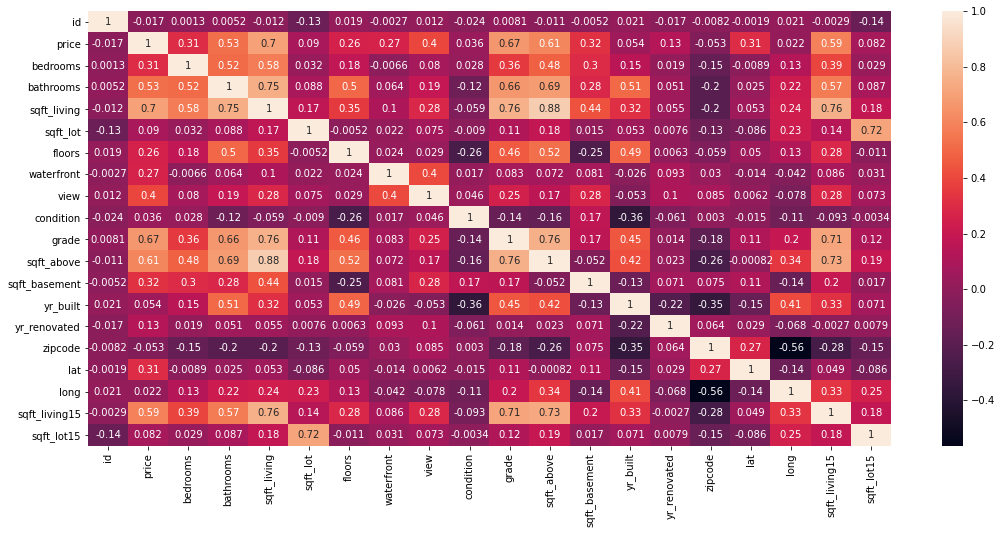

In [13]:
plt.figure(figsize = (18, 8))
sns.heatmap(df.corr(), annot = True);

In [14]:
x = df[["sqft_living", "grade", "sqft_above", "sqft_living15", "bathrooms", "view", "sqft_basement", "bedrooms", "lat", "waterfront", "floors"]]

In [15]:
y = df[["price"]]

In [16]:
showRegressionTest(x, y)

Hata payi:  226222.50493466953
Basari orani:  0.6614781405487572


In [17]:
df["zipcode"]=df["zipcode"].astype("category") 
#Burada zipcode(posta kodu ) integer bir değer. Bu yüzden makine sanki yüksek olan sayı gibi düşünecek.
#Fakat hiçbir posta kodunun diğerine üstünlüğü yok. Bu yüzden biz zipcode'u category'e dönüştürdük.


In [18]:
df["age"] = 2021 - df["yr_built"]

In [19]:
x = df[["sqft_living", "grade", "sqft_above", "sqft_living15", "bathrooms", "view", "sqft_basement", "bedrooms", "lat", "waterfront", "floors", "age", "zipcode"]]

In [20]:
x = pd.get_dummies(x, drop_first = True)

In [21]:
x.sample(5)

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,lat,waterfront,floors,age,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
15915,3630,9,2470,2560,3.75,0,1160,5,47.6816,0,1.5,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17966,1230,7,1230,1710,1.00,0,0,3,47.7633,0,1.0,66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
973,1710,8,1710,2120,2.50,0,0,3,47.5460,0,2.0,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1892,2150,6,2150,1720,1.00,0,0,3,47.7615,0,1.0,67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
18252,2830,9,2830,3557,2.50,0,0,3,47.7382,0,2.0,15,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
showRegressionTest(x, y)

Hata payi:  171984.93902320278
Basari orani:  0.8043427535283415


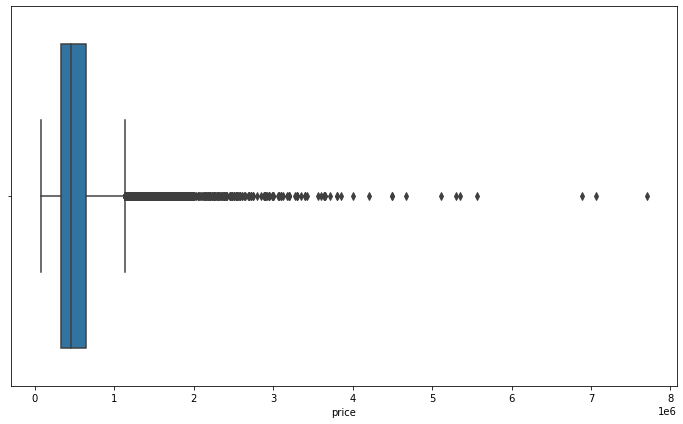

In [23]:
fig = plt.figure(figsize = (9.6, 6))
sns.boxplot(df["price"])
plt.tight_layout()

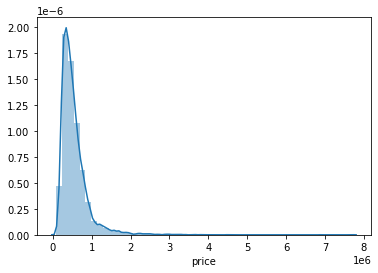

In [24]:
sns.distplot(df["price"]);

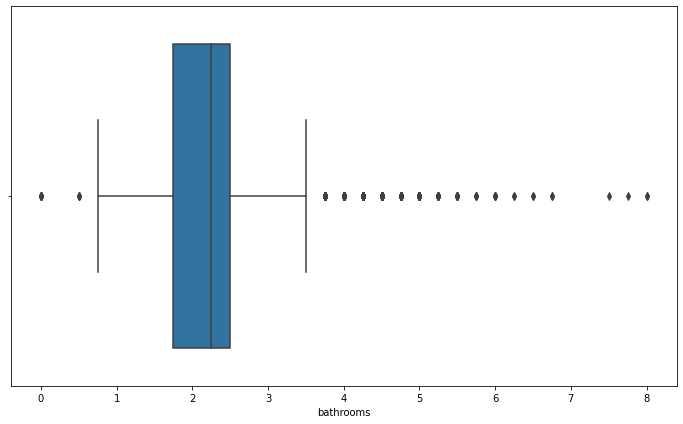

In [25]:
fig = plt.figure(figsize = (9.6, 6))
sns.boxplot(df["bathrooms"])
plt.tight_layout()

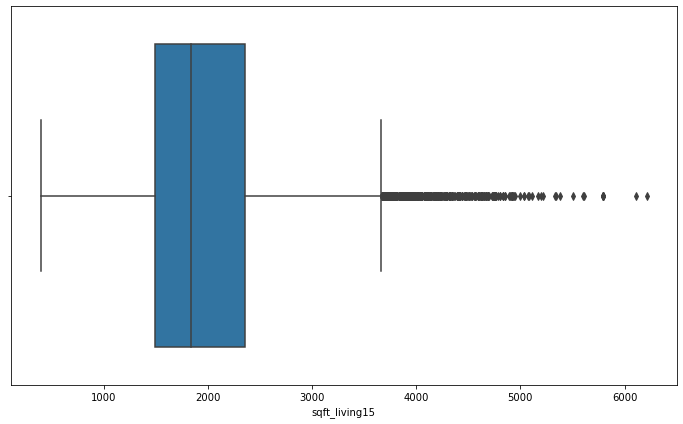

In [26]:
fig = plt.figure(figsize = (9.6, 6))
sns.boxplot(df["sqft_living15"])
plt.tight_layout()

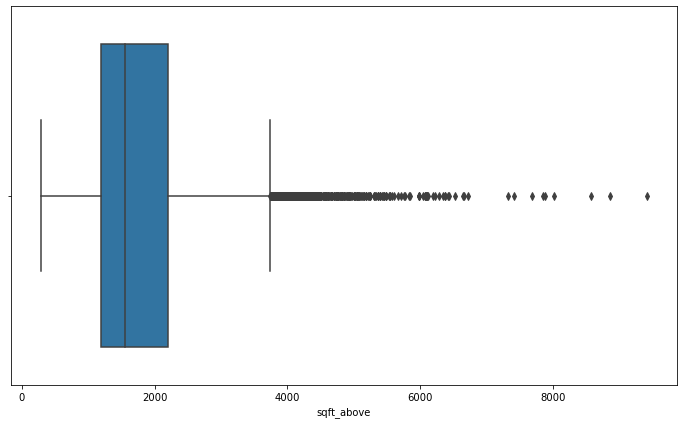

In [27]:
fig = plt.figure(figsize = (9.6, 6))
sns.boxplot(df["sqft_above"])
plt.tight_layout()

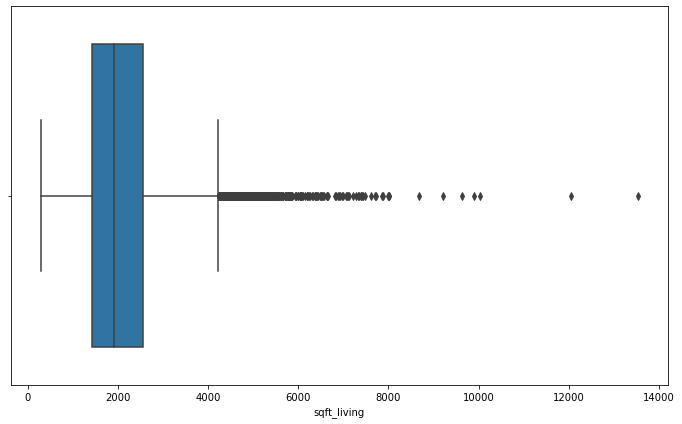

In [28]:
fig = plt.figure(figsize = (9.6, 6))
sns.boxplot(df["sqft_living"])
plt.tight_layout()

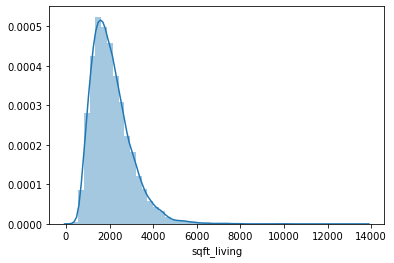

In [29]:
sns.distplot(df["sqft_living"]);

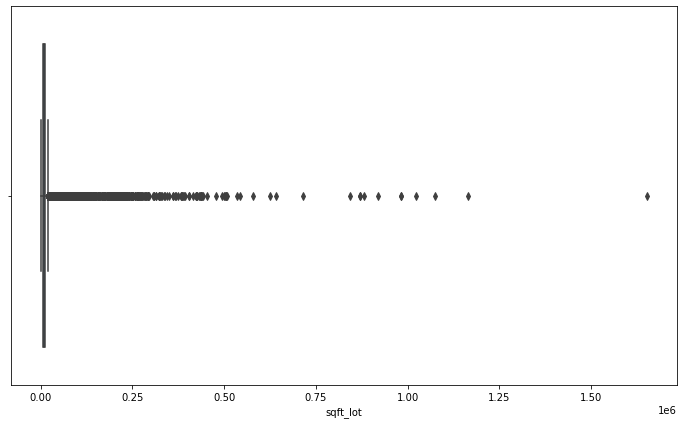

In [30]:
fig = plt.figure(figsize = (9.6, 6))
sns.boxplot(df["sqft_lot"])
plt.tight_layout()

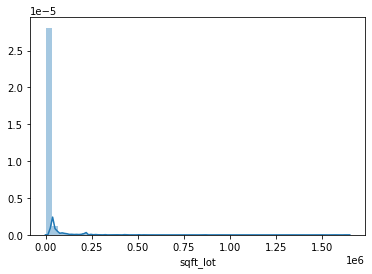

In [31]:
sns.distplot(df["sqft_lot"]);

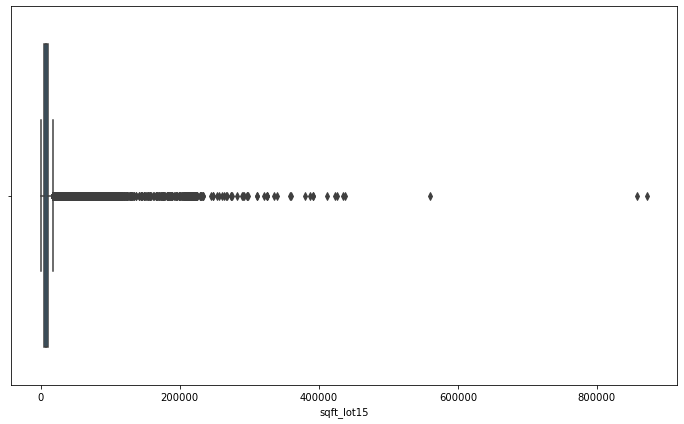

In [32]:
fig = plt.figure(figsize = (9.6, 6))
sns.boxplot(df["sqft_lot15"])
plt.tight_layout()

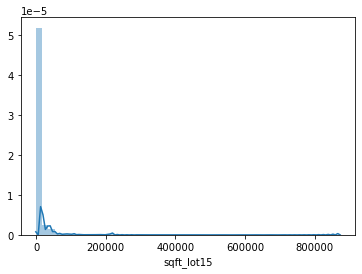

In [33]:
sns.distplot(df["sqft_lot15"]);

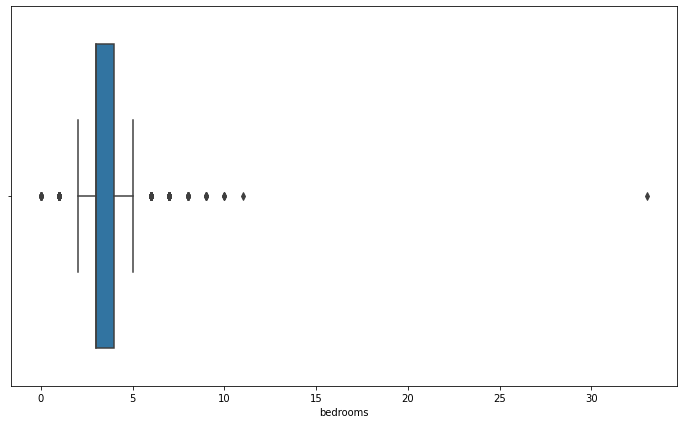

In [34]:
fig = plt.figure(figsize = (9.6, 6))
sns.boxplot(df["bedrooms"])
plt.tight_layout()

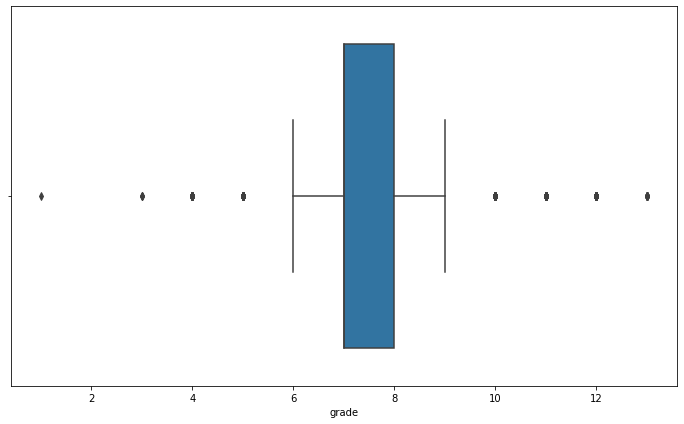

In [35]:
fig = plt.figure(figsize = (9.6, 6))
sns.boxplot(df["grade"])
plt.tight_layout()

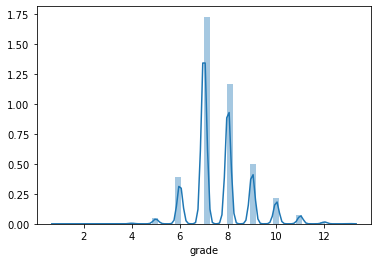

In [36]:
sns.distplot(df["grade"]);

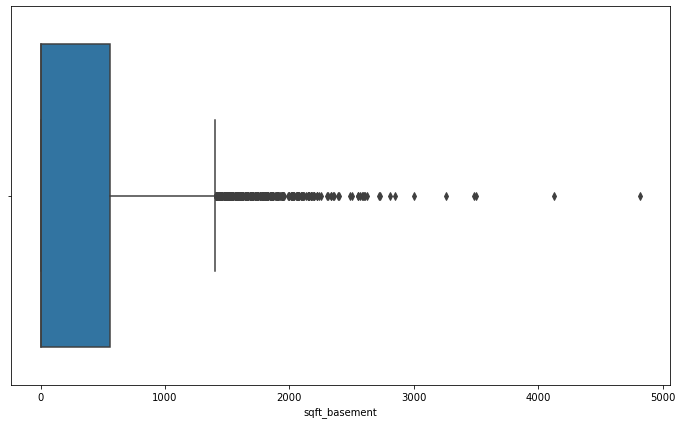

In [38]:
fig = plt.figure(figsize = (9.6, 6))
sns.boxplot(df["sqft_basement"])
plt.tight_layout()

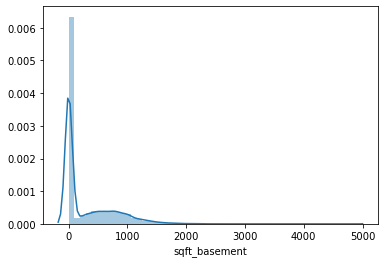

In [39]:
sns.distplot(df["sqft_basement"]);

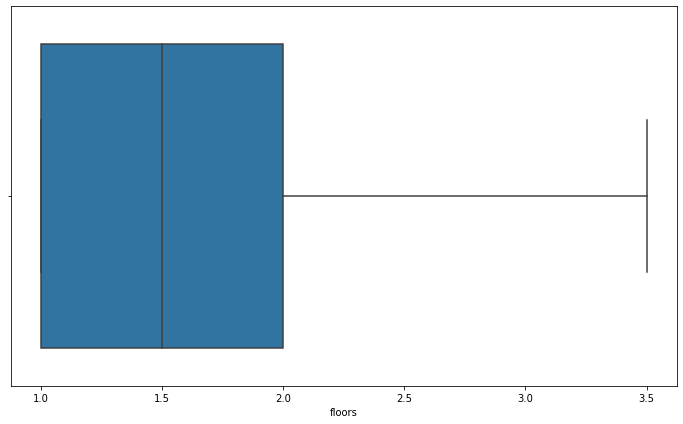

In [40]:
fig = plt.figure(figsize = (9.6, 6))
sns.boxplot(df["floors"])
plt.tight_layout()

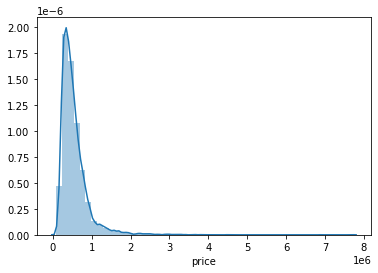

In [41]:
sns.distplot(df["price"]);

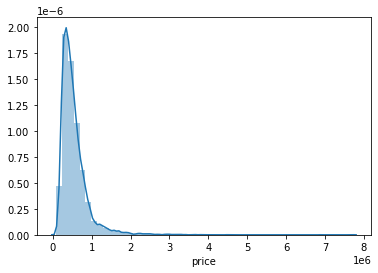

In [42]:
sns.distplot(df["price"]);

In [43]:
df = df[df["bedrooms"] < 10]

In [44]:
df = df[df["sqft_lot"] < 12500]

In [45]:
df = df[df["sqft_lot15"] < 250000]

In [46]:
df = df[df["sqft_living"] < 8000]

In [47]:
df = df[df["grade"] > 2]

In [48]:
df = df[df["floors"] < 3]

In [49]:
df = df[df["price"] < 770000]

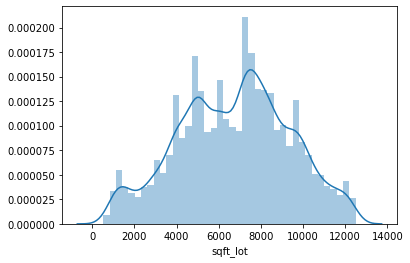

In [50]:
sns.distplot(df["sqft_lot"]);

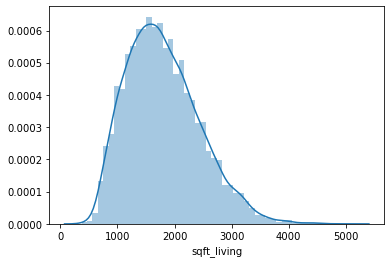

In [51]:
sns.distplot(df["sqft_living"]);

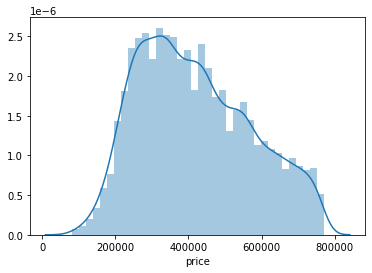

In [52]:
sns.distplot(df["price"]);

In [53]:
x = df[["sqft_living", "grade", "sqft_above", "sqft_living15", "bathrooms", "view", "bedrooms", "lat", "waterfront", "floors", "age", "zipcode", "sqft_lot", "sqft_lot15"]]
y = df[["price"]]
x = pd.get_dummies(x, drop_first = True)

In [54]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,age
count,1.474200e+04,14742.000000,14742.000000,14742.000000,14742.000000,14742.000000,14742.000000,14742.000000,14742.000000,14742.000000,14742.000000,14742.000000,14742.000000,14742.000000,14742.000000,14742.000000,14742.000000,14742.000000,14742.000000,14742.000000
mean,4.787874e+09,418019.215507,3.252544,1.944648,1796.564577,6732.462420,1.405033,0.000814,0.105074,3.409782,7.297585,1552.532831,244.031746,1968.828653,59.653778,47.551476,-122.228233,1784.314476,6872.533713,52.171347
std,2.864237e+09,153964.717605,0.870675,0.676686,638.989777,2638.670188,0.470668,0.028520,0.482953,0.649240,0.859726,610.164903,371.316067,29.674364,339.730243,0.142072,0.132783,509.267737,3442.342267,29.674364
min,1.000102e+06,80000.000000,0.000000,0.000000,370.000000,520.000000,1.000000,0.000000,0.000000,1.000000,4.000000,370.000000,0.000000,1900.000000,0.000000,47.189500,-122.512000,460.000000,651.000000,6.000000
25%,2.391600e+09,295000.000000,3.000000,1.500000,1320.000000,4850.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1100.000000,0.000000,1949.000000,0.000000,47.451325,-122.335000,1410.000000,5000.000000,27.000000
50%,4.083801e+09,399950.000000,3.000000,2.000000,1720.000000,6984.500000,1.000000,0.000000,0.000000,3.000000,7.000000,1400.000000,0.000000,1969.000000,0.000000,47.555700,-122.268000,1700.000000,7123.000000,52.000000
75%,7.519001e+09,530000.000000,4.000000,2.500000,2200.000000,8581.750000,2.000000,0.000000,0.000000,4.000000,8.000000,1870.000000,480.000000,1994.000000,0.000000,47.680275,-122.153000,2090.000000,8480.000000,72.000000
max,9.900000e+09,769995.000000,9.000000,7.500000,5110.000000,12498.000000,2.500000,1.000000,4.000000,5.000000,11.000000,4500.000000,2170.000000,2015.000000,2015.000000,47.777600,-121.315000,4410.000000,196591.000000,121.000000


In [55]:
x.sample(5)

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,bedrooms,lat,waterfront,floors,age,sqft_lot,sqft_lot15,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
21036,2460,8,2460,1850,2.50,0,4,47.6684,0,2.0,16,7930,9000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
492,1300,7,1300,1300,1.75,0,3,47.3811,0,1.0,53,11230,10794,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9643,2140,8,1320,1980,2.50,0,3,47.5602,0,1.0,63,10136,11200,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20972,2529,7,2529,2533,2.50,0,3,47.3738,0,2.0,9,9653,6125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10236,1140,7,1140,1150,1.50,0,3,47.5701,0,2.0,33,3292,3592,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
showRegressionTest(x, y)

Hata payi:  70323.7953401802
Basari orani:  0.7997460527260462


In [57]:
x["bedrooms"] = df["bedrooms"] ** 3

In [58]:
showRegressionTest(x, y)

Hata payi:  70043.22012652335
Basari orani:  0.8013407962633482


In [59]:
showRegressionTest(x, y)

Hata payi:  70043.22012652335
Basari orani:  0.8013407962633482
